Phan Damien M1 Info Maths

Contrôle continu 1 : Problème de Cauchy linéaire

Exercice 1 : 

- Ecrire la solution analytique de ce problème de Cauchy sans expliciter les calculs.

$$
u'(t) = P(t)u(t) + Q(t), \quad u(0) = 0,
$$
$$
u(t) = u(0) e^{\int_{t_0}^{t} P(s) , ds}
+ \int_{t_0}^{t} e^{\int_{s}^{t} P(u) , du}Q(s)ds
$$

Or $$P(t) = 1 $$ et $$  Q(t)=cos(t)$$ et $$u(0)=0$$
Donc 
$$
u(t) = \int_{0}^{t} e^{t-s} \cos(s) ds
$$

- Proposer une explicitation de la solution à l'aide de la librairie sympy

In [27]:
from IPython.display import display, Latex
from IPython.core.display import HTML
%reset -f
%matplotlib inline
%autosave 300
from matplotlib.pylab import *
import sympy as sy

Autosaving every 300 seconds


In [28]:
import sympy as sy

t, s = sy.symbols('t s')
f = sy.exp(t - s) * sy.cos(s)
u = sy.integrate(f, (s, 0, t))
result = sy.simplify(u)
display(result)


exp(t)/2 - sqrt(2)*cos(t + pi/4)/2

Exercice 2 : Résolution analytique (2 points)

- Ecrire la solution analytique de ce problème de Cauchy sans expliciter les calculs.

Toujours la meme forme : 

$$
u'(t) = P(t)u(t) + Q(t), \quad u(0) = 0,
$$
$$
u(t) = u(0) e^{\int_{t_0}^{t} P(s) , ds}
+ \int_{t_0}^{t} e^{\int_{s}^{t} P(u) , du}Q(s)ds
$$

Ici, $$P(t) = tan(t) $$ et $$  Q(t)=t^2$$ et $$u(0)=0$$

Donc 
$$
u(t) = \int_0^t e^{\int_s^t \tan(u),du}s^2ds
$$


- Proposer une explicitation de la solution à l'aide de la librairie sympy.

In [29]:
t, s = sy.symbols('t s')
f = s**2 * sy.cos(s) 
g = sy.integrate(f, (s, 0, t)) 
result = sy.simplify(g / sy.cos(t))
display(result)


t**2*tan(t) + 2*t - 2*tan(t)

Exercice 3 : Résolution analytique (3 points) 

- Ecrire la solution analytique de ce problème de Cauchy sans expliciter les calculs.



$$
\begin{cases}
u'(t) = 2u(t) - v(t) - t^2 \\
v'(t) = -u(t) + 2v(t) + t^2 \\
u(0) = 1, \quad v(0) = 0.\\
\end{cases}
$$

Solution : 
$$
X(t)=e^{A(t-t_0)}X(t_0)+\int_{t_0}^t e^{A(t-s)}\begin{pmatrix} s\\ s\end{pmatrix}ds
$$
avec t0 = 0
Donc : 
$$
X(t)=e^{A(t)}X(0)+\int_{0}^t e^{A(t-s)}\begin{pmatrix} s\\ s\end{pmatrix}ds
$$
où 
$$
X(t) = \begin{pmatrix} u(t) \\ v(t) \end{pmatrix},   
A = \begin{pmatrix} 2 & -1 \\ -1 & 2 \end{pmatrix},
Q(t) = \begin{pmatrix} -t^2 \\ t^2 \end{pmatrix},
X_0 = \begin{pmatrix} 1 \\ 0 \end{pmatrix}.
$$
$$
\begin{pmatrix} u(t) \\ v(t) \end{pmatrix}
= e^{\begin{pmatrix} 2 & -1 \\ -1 & 2 \end{pmatrix} (t)} \begin{pmatrix} 1 \\ 0 \end{pmatrix}

+ \int_0^t e^{\begin{pmatrix} 2 & -1 \\ -1 & 2 \end{pmatrix} (t-s)} \begin{pmatrix} -s^2 \\ s^2 \end{pmatrix} ds
$$

- Proposer une explicitation de la solution à l'aide de la librairie sympy.

In [30]:
t, s = sy.symbols('t s')

A = sy.Matrix([[2, -1],
               [-1, 2]])
X0 = sy.Matrix([1, 0])
Q = sy.Matrix([-s**2, s**2])

f = sy.exp(A*(t-s)) * Q
g = sy.integrate(f, (s, 0, t))

display(sy.simplify(g))
display(sy.simplify(sy.exp(A*t)*X0 + g), 'Solution complète X(t)')


Matrix([
[ t**2/3 + 2*t/9 - 2*exp(3*t)/27 + 2/27],
[-t**2/3 - 2*t/9 + 2*exp(3*t)/27 - 2/27]])

Matrix([
[ t**2/3 + 2*t/9 + 23*exp(3*t)/54 + exp(t)/2 + 2/27],
[-t**2/3 - 2*t/9 - 23*exp(3*t)/54 + exp(t)/2 - 2/27]])

'Solution complète X(t)'

Exercice 5 : Résolution par schéma numérique (5 points)

- Proposer un schéma d'Euler explicite pour résoudre numériquement ce problème de Cauchy.

Schéma d'Euler explicite (formule) : 
$$x_{n+1} = x_n + \Delta t f(t_n,x_n)$$
Appliqué à notre calcul matriciel : 
$$
X_{n+1}=X_n+\Delta t\big(AX_n(t)+Q(t_n)\big), ~ t_n=n\Delta t ~;~ X_0=\begin{pmatrix}1\\0\end{pmatrix}.
$$
Avec : 
$$
\begin{cases}
u_{n+1}=u_n+\Delta t\big(2u_n-v_n-t_n^2\big)\\
v_{n+1}=v_n+\Delta t\big(-u_n+2v_n+t_n^2\big).
\end{cases}
$$

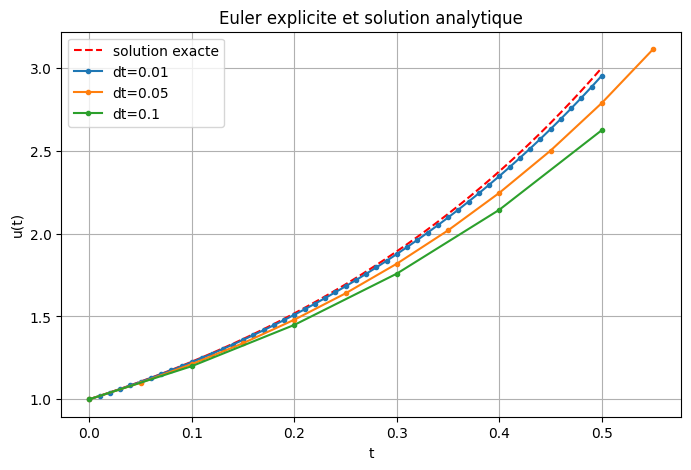

In [31]:
def f(t, u, v):
    du = 2*u - v - t**2
    dv = -u + 2*v + t**2
    return du, dv

def Eulerexpl(u0, v0, t0, T, dt):
    t = t0
    u, v = u0, v0
    tval = [t]
    uval = [u]
    vval = [v]
    while t < T:
        du, dv = f(t, u, v)
        u += dt*du
        v += dt*dv
        t += dt
        tval.append(t)
        uval.append(u)
        vval.append(v)
    return tval, uval, vval

t = sy.symbols('t')
u = sy.Function('u')(t)
v = sy.Function('v')(t)

eq1 = sy.Eq(u.diff(t), 2*u - v - t**2)
eq2 = sy.Eq(v.diff(t), -u + 2*v + t**2)

sol = sy.dsolve([eq1, eq2], ics={u.subs(t,0):1, v.subs(t,0):0})
u_exact_func = sy.lambdify(t, sol[0].rhs, 'numpy')
v_exact_func = sy.lambdify(t, sol[1].rhs, 'numpy')

T = 0.5
u0, v0 = 1, 0
dts = [0.01, 0.05, 0.1]

figure(figsize=(8,5))
t_exact = np.linspace(0, T, 500)
plot(t_exact, u_exact_func(t_exact), 'r--', label='solution exacte')

for dt in dts:
    tval, uval, vval = Eulerexpl(u0, v0, 0, T, dt)
    plot(tval, uval, '.-', label=f'dt={dt}')

xlabel('t')
ylabel('u(t)')
title("Euler explicite et solution analytique")
legend()
grid(True)
show()


In [32]:
def f(t, u, v):
    du = 2*u - v - t**2
    dv = -u + 2*v + t**2
    return du, dv

def Eulerexpl(u0, v0, t0, T, dt):
    t = t0
    u, v = u0, v0
    while t < T:
        du, dv = f(t, u, v)
        u += dt*du
        v += dt*dv
        t += dt
    return u, v

t = sy.symbols('t')
u = sy.Function('u')(t)
v = sy.Function('v')(t)
eq1 = sy.Eq(u.diff(t), 2*u - v - t**2)
eq2 = sy.Eq(v.diff(t), -u + 2*v + t**2)
sol = sy.dsolve([eq1, eq2], ics={u.subs(t,0):1, v.subs(t,0):0})
u_exact_func = sy.lambdify(t, sol[0].rhs, 'numpy')
v_exact_func = sy.lambdify(t, sol[1].rhs, 'numpy')

T = 0.5
u0, v0 = 1, 0
dts = [0.01, 0.05, 0.1]

for dt in dts:
    u_num, v_num = Eulerexpl(u0, v0, 0, T, dt)
    err = abs(u_exact_func(T) - u_num)
    print(f"dt={dt}: u(T)={u_num:.6f}, erreur={err:.6e}")


dt=0.01: u(T)=2.954294, erreur=4.745296e-02
dt=0.05: u(T)=3.113582, erreur=1.118356e-01
dt=0.1: u(T)=2.625063, erreur=3.766837e-01


On observe que l’erreur diminue lorsque Δt diminue (plus le pas est petit, plus l’approximation est précise).

- Proposer le même calcul avec le schéma de Heun. Comment se comporte l'erreur avec δtδt ?

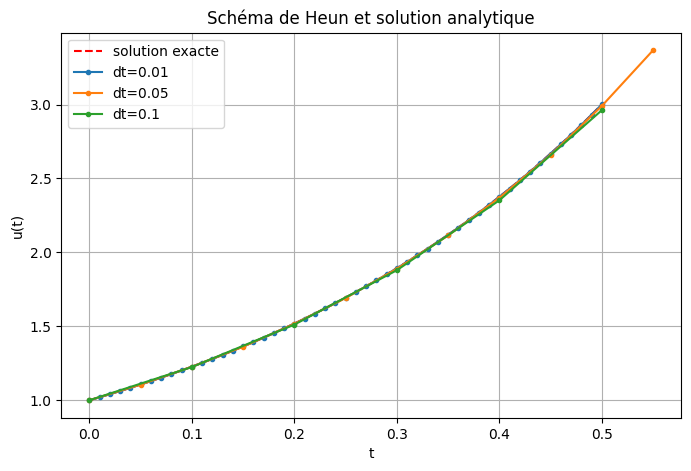

dt=0.01: u(T)=3.001263, erreur=4.838740e-04
dt=0.05: u(T)=3.367496, erreur=3.657495e-01
dt=0.1: u(T)=2.962071, erreur=3.967547e-02


In [33]:
from matplotlib.pylab import *
import numpy as np
import sympy as sy

def f(t, u, v):
    du = 2*u - v - t**2
    dv = -u + 2*v + t**2
    return du, dv

def Heun(u0, v0, t0, T, dt):
    t = t0
    u, v = u0, v0
    tval = [t]
    uval = [u]
    vval = [v]
    while t < T:
        du1, dv1 = f(t, u, v)
        u_predict = u + dt * du1
        v_predict = v + dt * dv1
        du2, dv2 = f(t + dt, u_predict, v_predict)
        u += dt * (du1 + du2)/2
        v += dt * (dv1 + dv2)/2
        t += dt
        tval.append(t)
        uval.append(u)
        vval.append(v)
    return tval, uval, vval

t = sy.symbols('t')
u = sy.Function('u')(t)
v = sy.Function('v')(t)
eq1 = sy.Eq(u.diff(t), 2*u - v - t**2)
eq2 = sy.Eq(v.diff(t), -u + 2*v + t**2)
sol = sy.dsolve([eq1, eq2], ics={u.subs(t,0):1, v.subs(t,0):0})
u_exact_func = sy.lambdify(t, sol[0].rhs, 'numpy')

T = 0.5
u0, v0 = 1, 0
dts = [0.01, 0.05, 0.1]

figure(figsize=(8,5))
t_exact = np.linspace(0, T, 500)
plot(t_exact, u_exact_func(t_exact), 'r--', label='solution exacte')

for dt in dts:
    tval, uval, vval = Heun(u0, v0, 0, T, dt)
    plot(tval, uval, '.-', label=f'dt={dt}')

xlabel('t')
ylabel('u(t)')
title("Schéma de Heun et solution analytique")
legend()
grid(True)
show()

for dt in dts:
    tval, uval, vval = Heun(u0, v0, 0, T, dt)
    uT = uval[-1]
    erreur = abs(uT - u_exact_func(T))
    print(f'dt={dt}: u(T)={uT:.6f}, erreur={erreur:.6e}')


On observe que l’erreur diminue lorsque Δt diminue (plus le pas est petit, plus l’approximation est précise) et donc a le même comportement que précèdement, cependant, on est plus précis.